In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Iris flower data.csv')
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Sex                  334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [6]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [7]:
df.drop(['studyName','Sample Number','Individual ID','Date Egg','Comments'], inplace=True, axis=1)

In [8]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


In [9]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [12]:
df['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [13]:
# df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)']=='.','190',df['Flipper Length (mm)'])
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)']=='.',np.nan,df['Flipper Length (mm)'])

In [14]:
df['Flipper Length (mm)'].value_counts()

190    22
195    16
187    16
193    15
210    14
191    13
215    12
197    10
196    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
181     7
189     7
230     7
192     7
184     7
199     6
213     6
188     6
214     6
217     6
222     6
201     6
219     5
209     5
218     5
221     5
203     5
194     5
180     5
178     4
225     4
228     4
202     4
200     4
182     3
224     3
205     3
229     2
183     2
207     2
223     2
211     2
231     1
206     1
174     1
172     1
179     1
176     1
226     1
Name: Flipper Length (mm), dtype: int64

In [15]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(3), object(4)
memory usage: 18.9+ KB


In [17]:
df['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [18]:
#df['Body Mass (g)'] = np.where(df['Body Mass (g)']=='.','3800',df['Body Mass (g)'])
df['Body Mass (g)'] = np.where(df['Body Mass (g)']=='.',np.nan,df['Body Mass (g)'])

In [19]:
df['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 94, dtype: int64

In [20]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        341 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:ylabel='Culmen Length (mm)'>

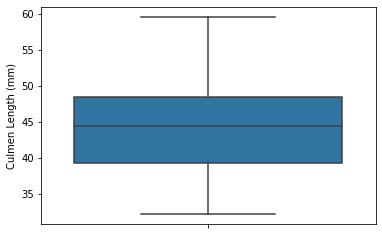

In [22]:
sns.boxplot(y = 'Culmen Length (mm)', data=df)

<AxesSubplot:ylabel='Culmen Depth (mm)'>

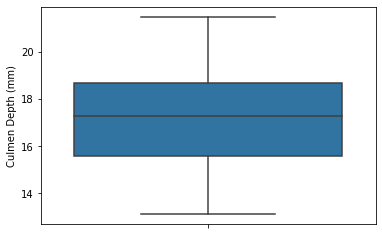

In [23]:
sns.boxplot(y = 'Culmen Depth (mm)', data=df)

<AxesSubplot:ylabel='Flipper Length (mm)'>

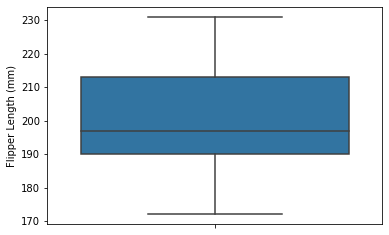

In [24]:
sns.boxplot(y = 'Flipper Length (mm)', data=df)

<AxesSubplot:ylabel='Body Mass (g)'>

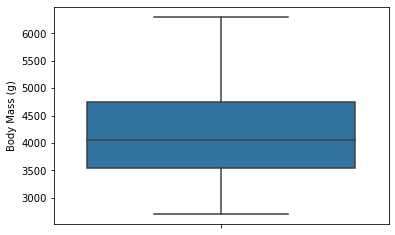

In [25]:
sns.boxplot(y = 'Body Mass (g)', data=df)

In [26]:
df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [27]:
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

In [28]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                    10
dtype: int64

In [29]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [30]:
df['Sex'] = np.where(df['Sex']=='.','MALE', df['Sex'])

In [31]:
df['Sex'] = df['Sex'].fillna('MALE')

In [32]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [34]:
df.head(20)

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.10000,18.70000,181.000000,4203.079179,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.30000,18.00000,200.932551,3250.000000,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,43.92193,17.15117,200.932551,4203.079179,MALE
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.30000,20.60000,190.000000,3650.000000,MALE
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,38.90000,17.80000,181.000000,3625.000000,FEMALE
7,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.20000,19.60000,195.000000,4675.000000,MALE
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,34.10000,18.10000,193.000000,3475.000000,MALE
9,Adelie Penguin (Pygoscelis adeliae),Torgersen,42.00000,20.20000,190.000000,4250.000000,MALE


In [36]:
df.tail()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
339,Gentoo penguin (Pygoscelis papua),Biscoe,43.92193,17.15117,200.932551,4203.079179,MALE
340,Gentoo penguin (Pygoscelis papua),Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE
343,Gentoo penguin (Pygoscelis papua),Biscoe,49.90000,16.10000,213.000000,5400.000000,MALE


In [37]:
df= pd.get_dummies(columns=['Island'], data=df ,drop_first=True)

In [38]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Island_Dream,Island_Torgersen
0,Adelie Penguin (Pygoscelis adeliae),39.10000,18.70000,181.000000,4203.079179,MALE,0,1
1,Adelie Penguin (Pygoscelis adeliae),39.50000,17.40000,186.000000,3800.000000,FEMALE,0,1
2,Adelie Penguin (Pygoscelis adeliae),40.30000,18.00000,200.932551,3250.000000,FEMALE,0,1
3,Adelie Penguin (Pygoscelis adeliae),43.92193,17.15117,200.932551,4203.079179,MALE,0,1
4,Adelie Penguin (Pygoscelis adeliae),36.70000,19.30000,193.000000,3450.000000,FEMALE,0,1


In [39]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [40]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,Adelie Penguin (Pygoscelis adeliae),39.10000,18.70000,181.000000,4203.079179,0,1,1
1,Adelie Penguin (Pygoscelis adeliae),39.50000,17.40000,186.000000,3800.000000,0,1,0
2,Adelie Penguin (Pygoscelis adeliae),40.30000,18.00000,200.932551,3250.000000,0,1,0
3,Adelie Penguin (Pygoscelis adeliae),43.92193,17.15117,200.932551,4203.079179,0,1,1
4,Adelie Penguin (Pygoscelis adeliae),36.70000,19.30000,193.000000,3450.000000,0,1,0


In [41]:
df['Sex_MALE'].value_counts()

1    179
0    165
Name: Sex_MALE, dtype: int64

Number of Male : 179
Number of Female : 165


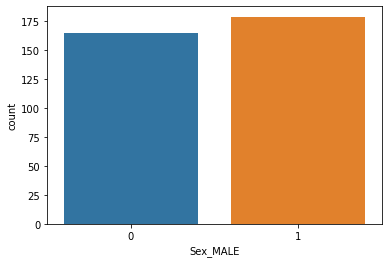

In [42]:
sns.countplot(data=df, x = 'Sex_MALE')
Male, Female = df['Sex_MALE'].value_counts()
print("Number of Male :", Male)
print("Number of Female :", Female)
plt.show()

In [43]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

Number of Adelie Penguin : 152
Number of Gentoo penguin : 124
Number of Chinstrap penguin : 68


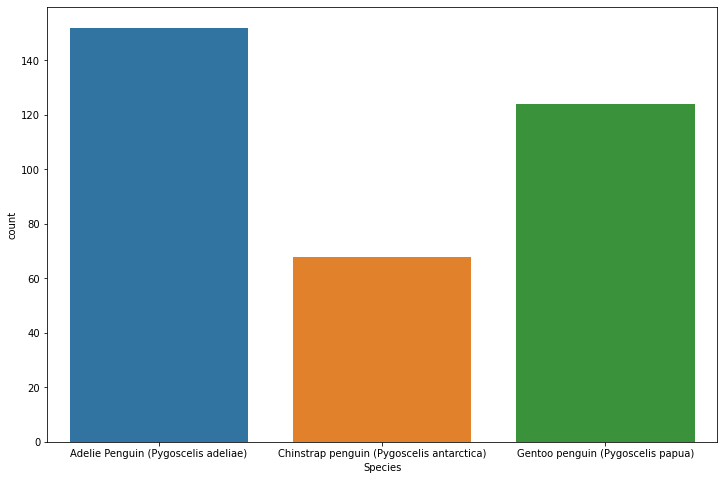

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x = 'Species' )
A,B,C = df['Species'].value_counts()
print("Number of Adelie Penguin :", A)
print("Number of Gentoo penguin :", B)
print("Number of Chinstrap penguin :", C)
plt.show()

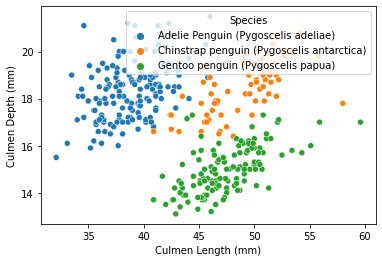

In [45]:
sns.scatterplot(x='Culmen Length (mm)',y='Culmen Depth (mm)', data= df, hue='Species')
plt.show()

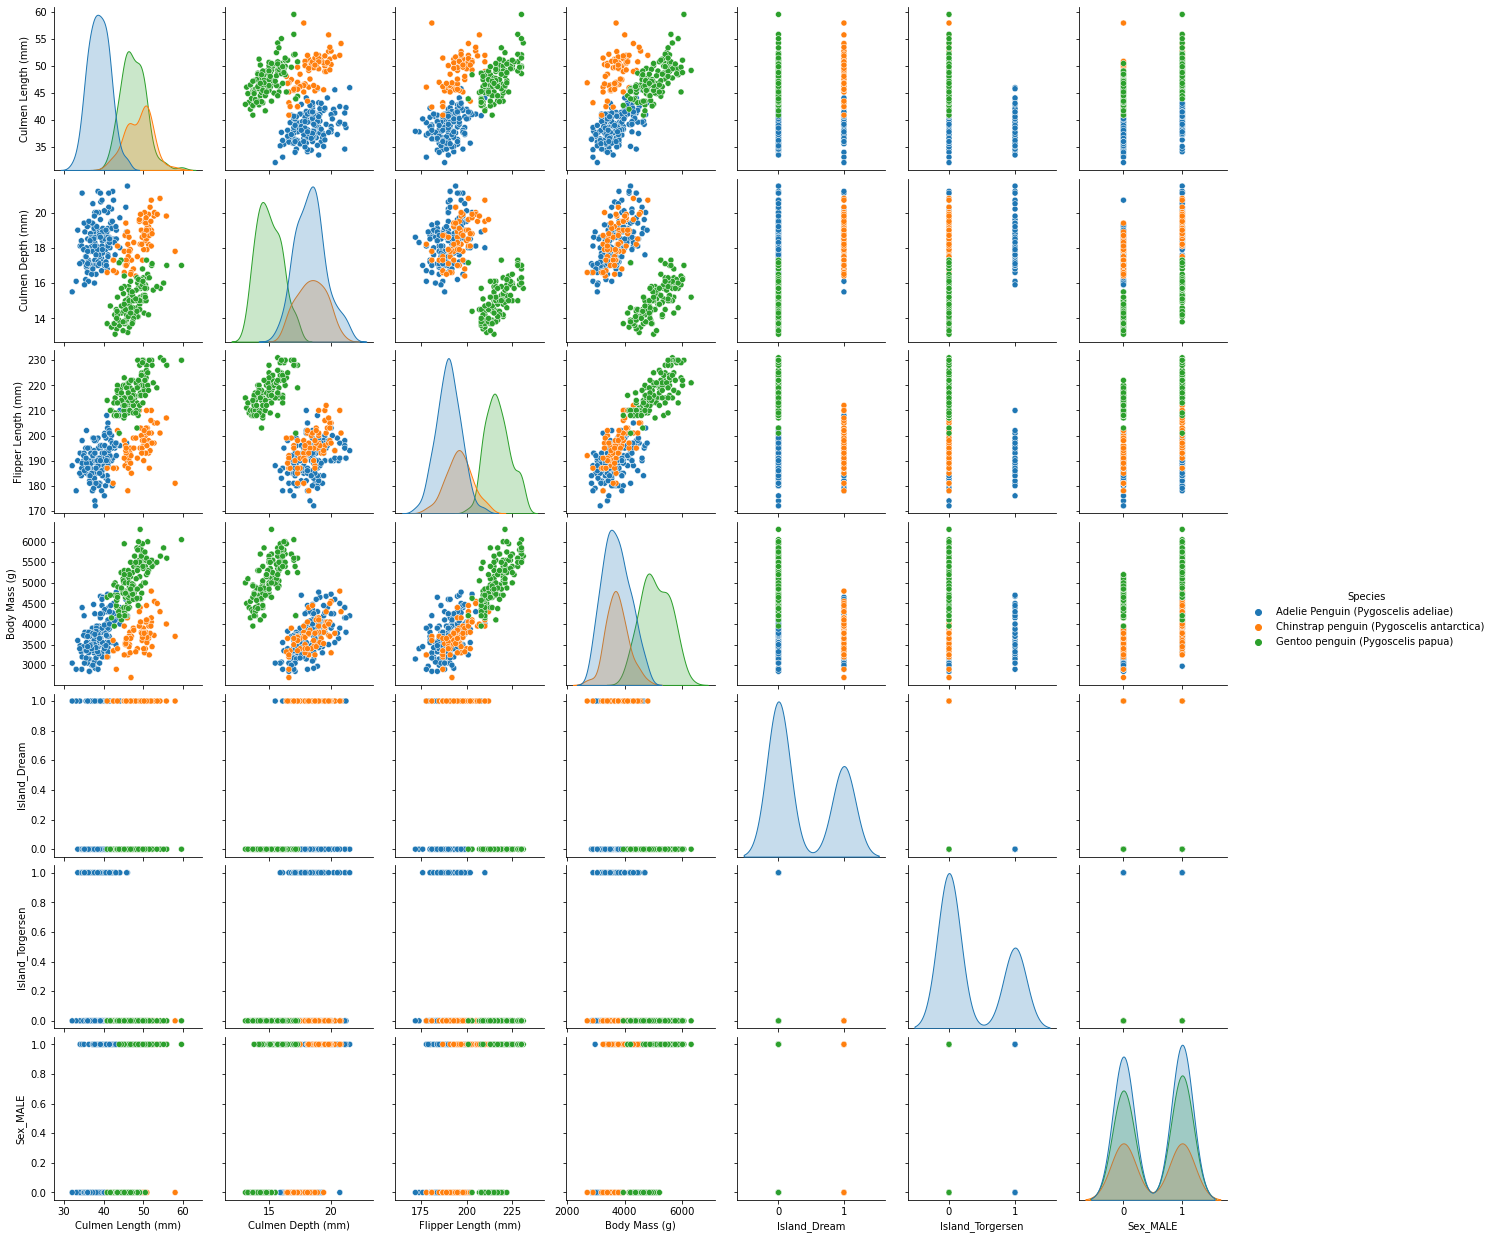

In [46]:
sns.pairplot(data=df, hue='Species')
plt.show()

<AxesSubplot:>

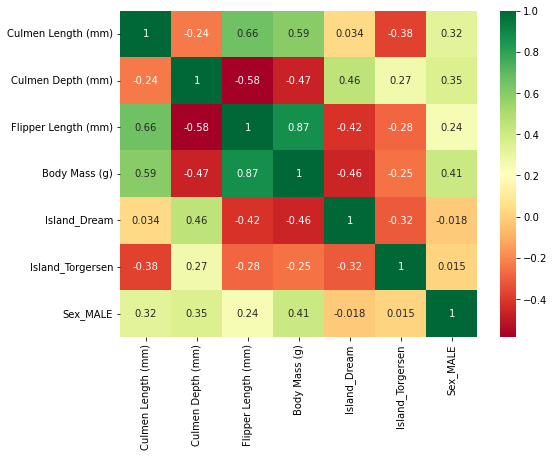

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

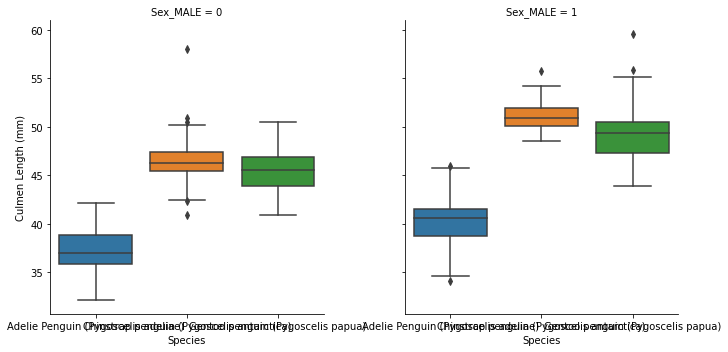

In [48]:

sns.catplot(data=df, x='Species', y='Culmen Length (mm)', kind='box', col='Sex_MALE')
plt.show()  

In [49]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,Adelie Penguin (Pygoscelis adeliae),39.10000,18.70000,181.000000,4203.079179,0,1,1
1,Adelie Penguin (Pygoscelis adeliae),39.50000,17.40000,186.000000,3800.000000,0,1,0
2,Adelie Penguin (Pygoscelis adeliae),40.30000,18.00000,200.932551,3250.000000,0,1,0
3,Adelie Penguin (Pygoscelis adeliae),43.92193,17.15117,200.932551,4203.079179,0,1,1
4,Adelie Penguin (Pygoscelis adeliae),36.70000,19.30000,193.000000,3450.000000,0,1,0


In [50]:
# split the data into x and y for Ind and dv

x = df.iloc[:,1:]
y = df.iloc[:,0]

In [51]:
print(x.head())

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0            39.10000           18.70000           181.000000    4203.079179   
1            39.50000           17.40000           186.000000    3800.000000   
2            40.30000           18.00000           200.932551    3250.000000   
3            43.92193           17.15117           200.932551    4203.079179   
4            36.70000           19.30000           193.000000    3450.000000   

   Island_Dream  Island_Torgersen  Sex_MALE  
0             0                 1         1  
1             0                 1         0  
2             0                 1         0  
3             0                 1         1  
4             0                 1         0  


In [52]:
print(y.head())

0    Adelie Penguin (Pygoscelis adeliae)
1    Adelie Penguin (Pygoscelis adeliae)
2    Adelie Penguin (Pygoscelis adeliae)
3    Adelie Penguin (Pygoscelis adeliae)
4    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object


In [53]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(258, 7)
(86, 7)
(258,)
(86,)


# DecisionTree Model Building with training dataset

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train, y_train)
dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# Predict the test data by using decision tree model

In [57]:
y_pred_train = dt1.predict(x_train)
y_pred_test = dt1.predict(x_test)

y_pred_train_1 = dt2.predict(x_train)
y_pred_test_1 = dt2.predict(x_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [59]:
print(classification_report(y_train, y_pred_train))

print("#####"*20)

print(classification_report(y_train, y_pred_train_1))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00       115
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        47
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        96

                                 accuracy                           1.00       258
                                macro avg       1.00      1.00      1.00       258
                             weighted avg       1.00      1.00      1.00       258

####################################################################################################
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00       115
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        47
        Gentoo penguin (Pygoscelis papua)       1.00      1.00   

In [60]:
print(classification_report(y_test, y_pred_test))

print("#####"*20)

print(classification_report(y_test, y_pred_test_1))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.97      0.99        37
Chinstrap penguin (Pygoscelis antarctica)       0.95      1.00      0.98        21
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        28

                                 accuracy                           0.99        86
                                macro avg       0.98      0.99      0.99        86
                             weighted avg       0.99      0.99      0.99        86

####################################################################################################
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      0.92      0.94        37
Chinstrap penguin (Pygoscelis antarctica)       0.87      0.95      0.91        21
        Gentoo penguin (Pygoscelis papua)       1.00      1.00   

In [63]:
print(confusion_matrix(y_train, y_pred_train))

print("#####"*20)

print(confusion_matrix(y_train, y_pred_train_1))

[[115   0   0]
 [  0  47   0]
 [  0   0  96]]
####################################################################################################
[[115   0   0]
 [  0  47   0]
 [  0   0  96]]


In [64]:
print(confusion_matrix(y_test, y_pred_test))

print("#####"*20)

print(confusion_matrix(y_test, y_pred_test_1))

[[36  1  0]
 [ 0 21  0]
 [ 0  0 28]]
####################################################################################################
[[34  3  0]
 [ 1 20  0]
 [ 0  0 28]]


In [65]:
print(accuracy_score(y_train, y_pred_train))

print("#####"*20)

print(accuracy_score(y_train, y_pred_train_1))

1.0
####################################################################################################
1.0


In [66]:
print(accuracy_score(y_test, y_pred_test))

print("#####"*20)

print(accuracy_score(y_test, y_pred_test_1))

0.9883720930232558
####################################################################################################
0.9534883720930233


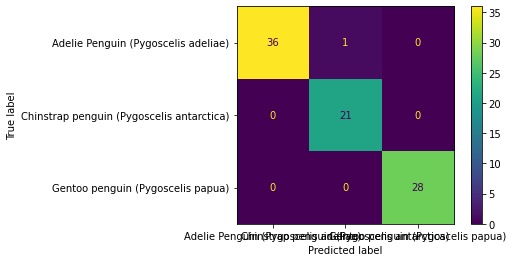

In [67]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt1,x_test, y_test)
plt.show()

In [68]:
# Accuracy
# Training = 100%
# Test = 98.83%


In [69]:
dt1.feature_importances_

array([0.3341183 , 0.05347894, 0.5421279 , 0.00820728, 0.02667367,
       0.00615546, 0.02923844])

In [73]:
pd.DataFrame(index=x.columns, data=dt1.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Culmen Length (mm),0.334118
Culmen Depth (mm),0.053479
Flipper Length (mm),0.542128
Body Mass (g),0.008207
Island_Dream,0.026674
Island_Torgersen,0.006155
Sex_MALE,0.029238


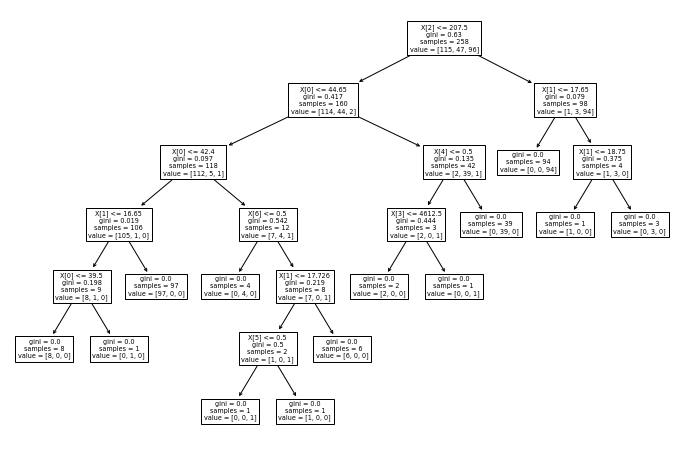

In [74]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt1)
plt.show()

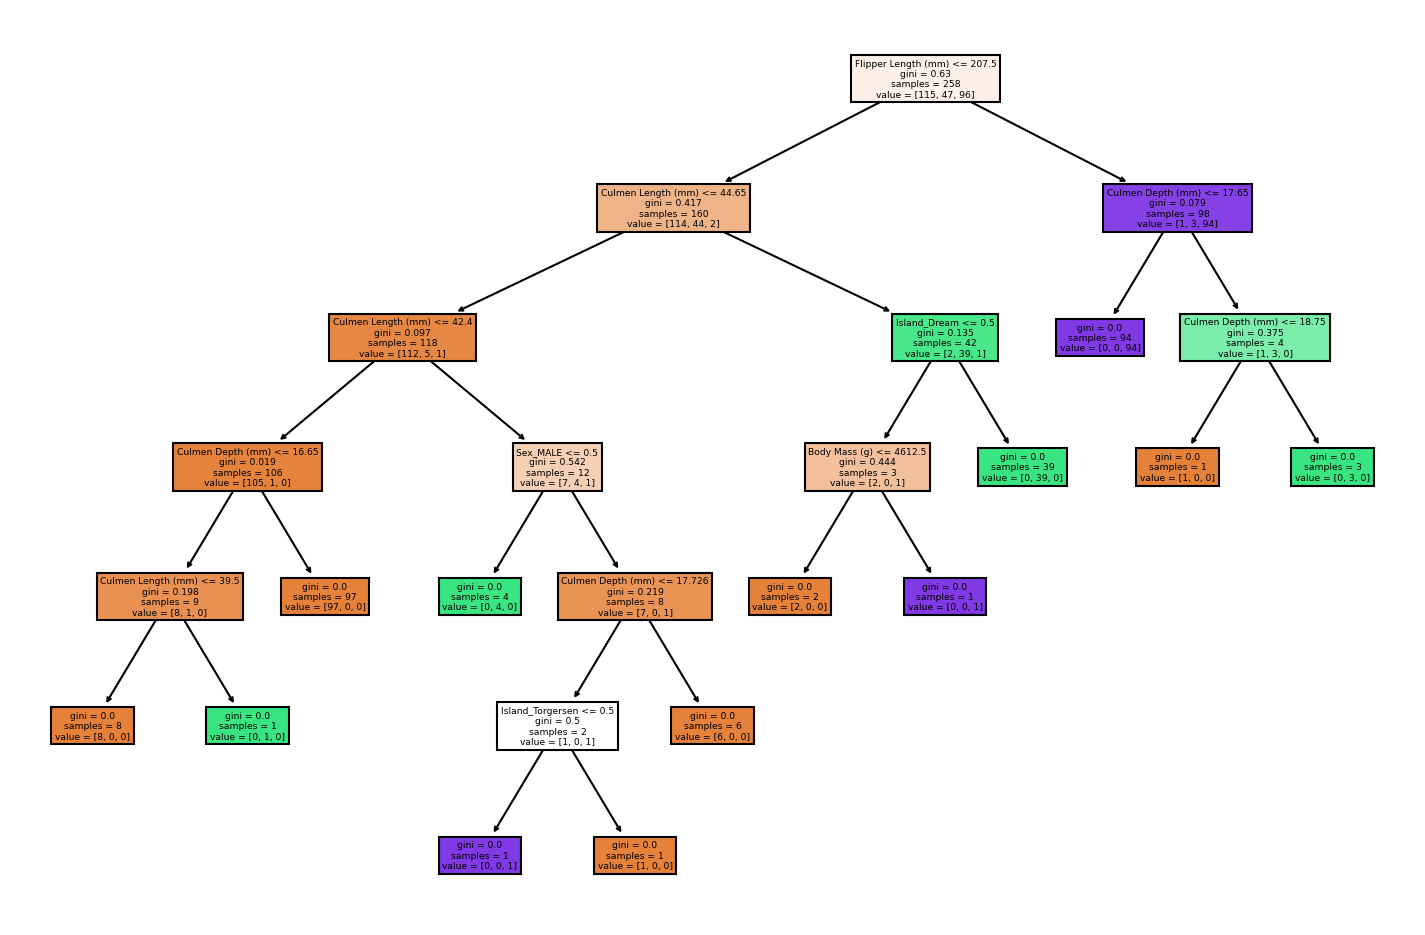

In [75]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(dt1, filled=True, feature_names =x.columns )
plt.show()

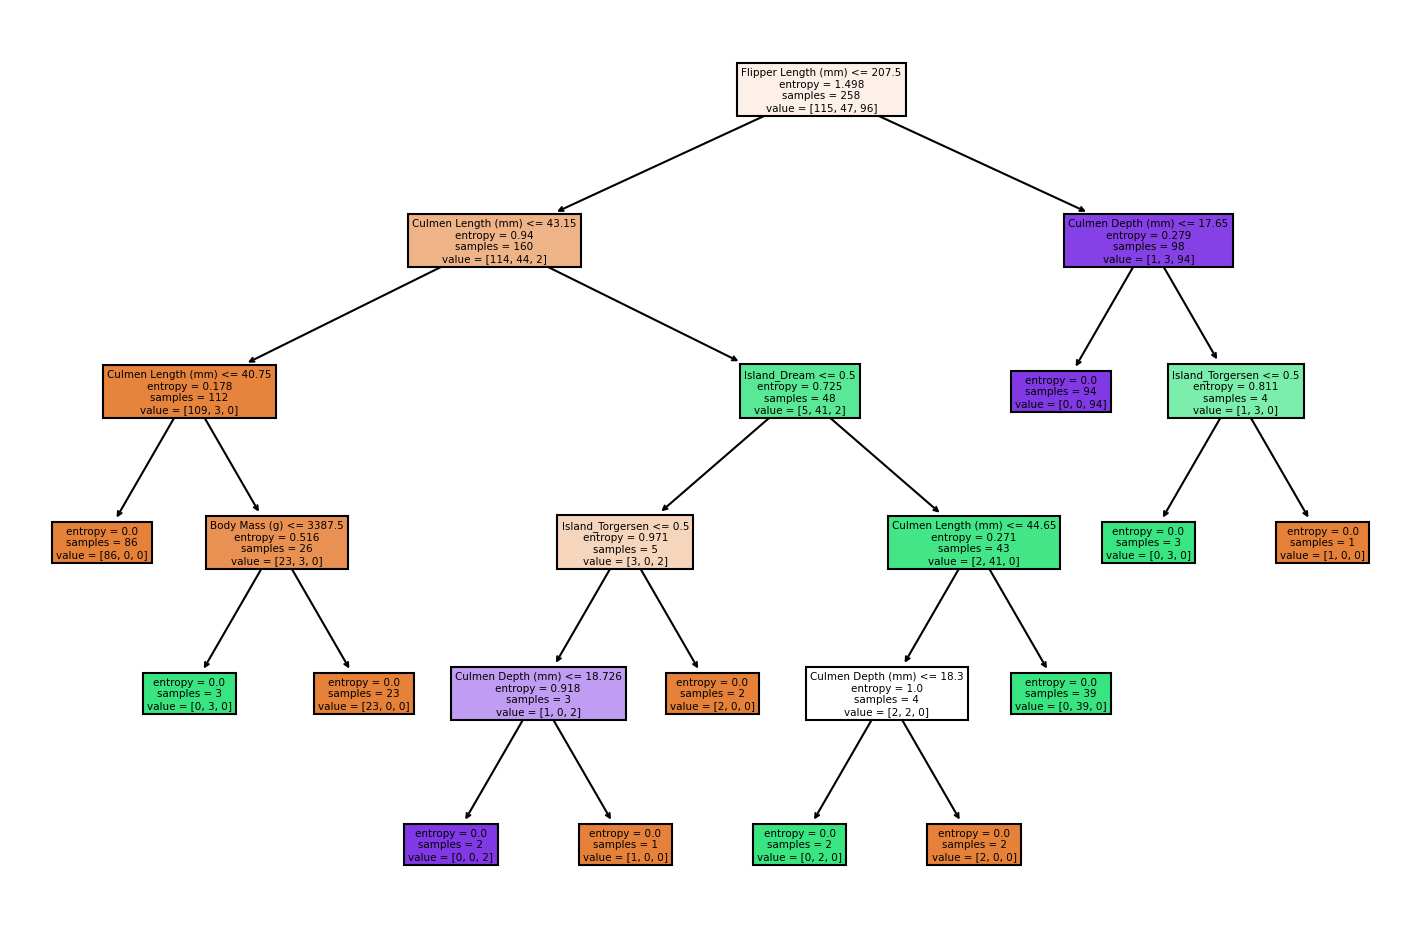

In [76]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(dt2, filled=True, feature_names =x.columns )
plt.show()

In [84]:
# Pre-prunning and post-prunning 
# overfitting problem

In [85]:
# user define function

def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, filled=True, feature_names=x.columns)

In [86]:
# Hyperparameters in DT

pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      0.95      0.96        37
Chinstrap penguin (Pygoscelis antarctica)       0.87      0.95      0.91        21
        Gentoo penguin (Pygoscelis papua)       1.00      0.96      0.98        28

                                 accuracy                           0.95        86
                                macro avg       0.95      0.95      0.95        86
                             weighted avg       0.96      0.95      0.95        86





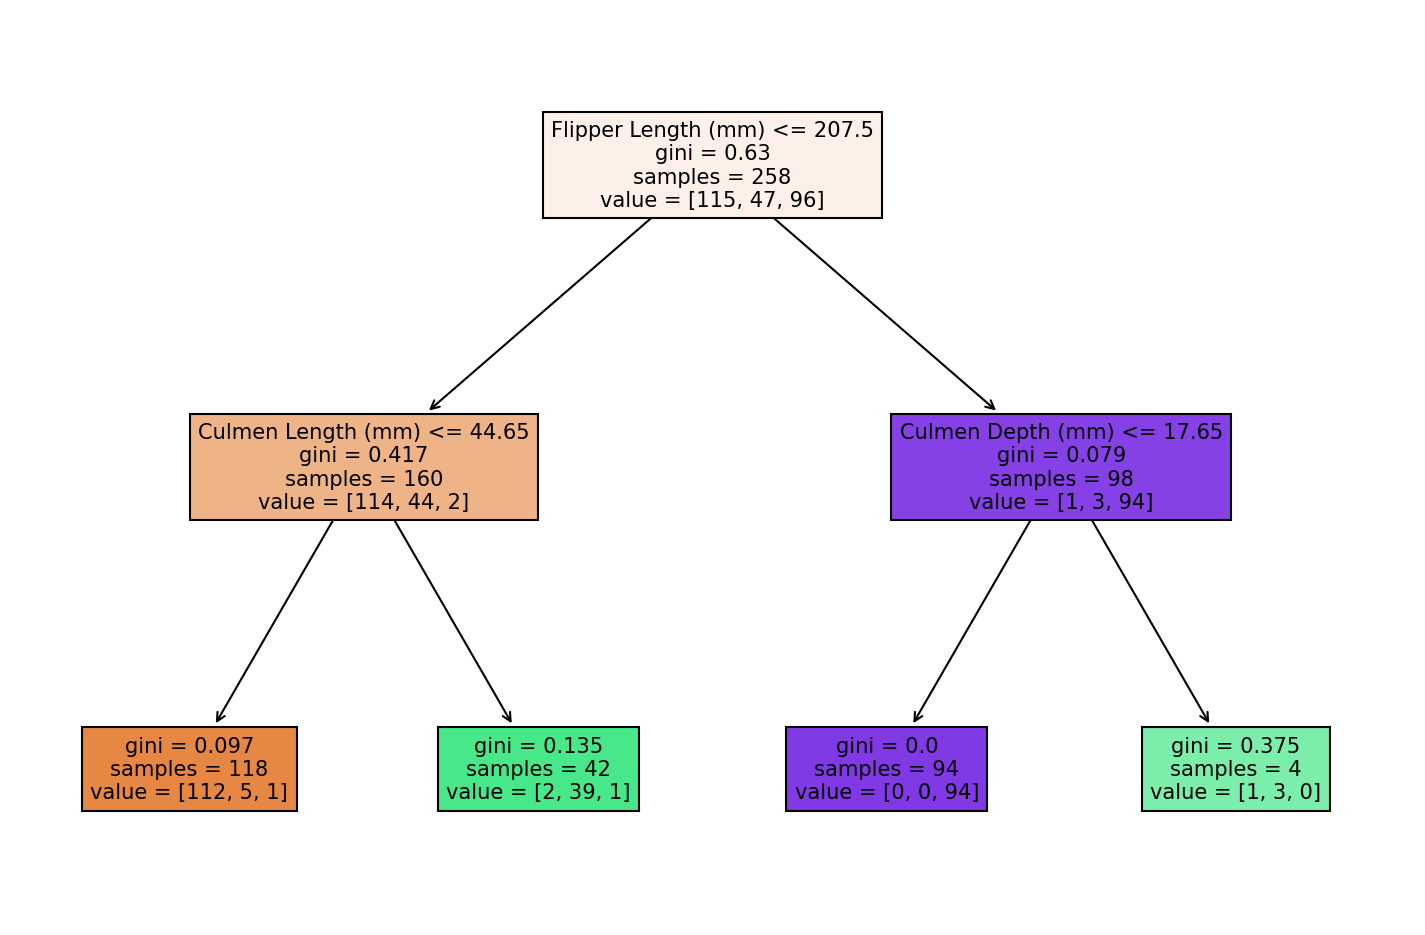

In [87]:
report_model(pruned_tree)

In [88]:
pruned_tree1 = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree1.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      0.95      0.96        37
Chinstrap penguin (Pygoscelis antarctica)       0.90      0.90      0.90        21
        Gentoo penguin (Pygoscelis papua)       0.93      0.96      0.95        28

                                 accuracy                           0.94        86
                                macro avg       0.94      0.94      0.94        86
                             weighted avg       0.94      0.94      0.94        86





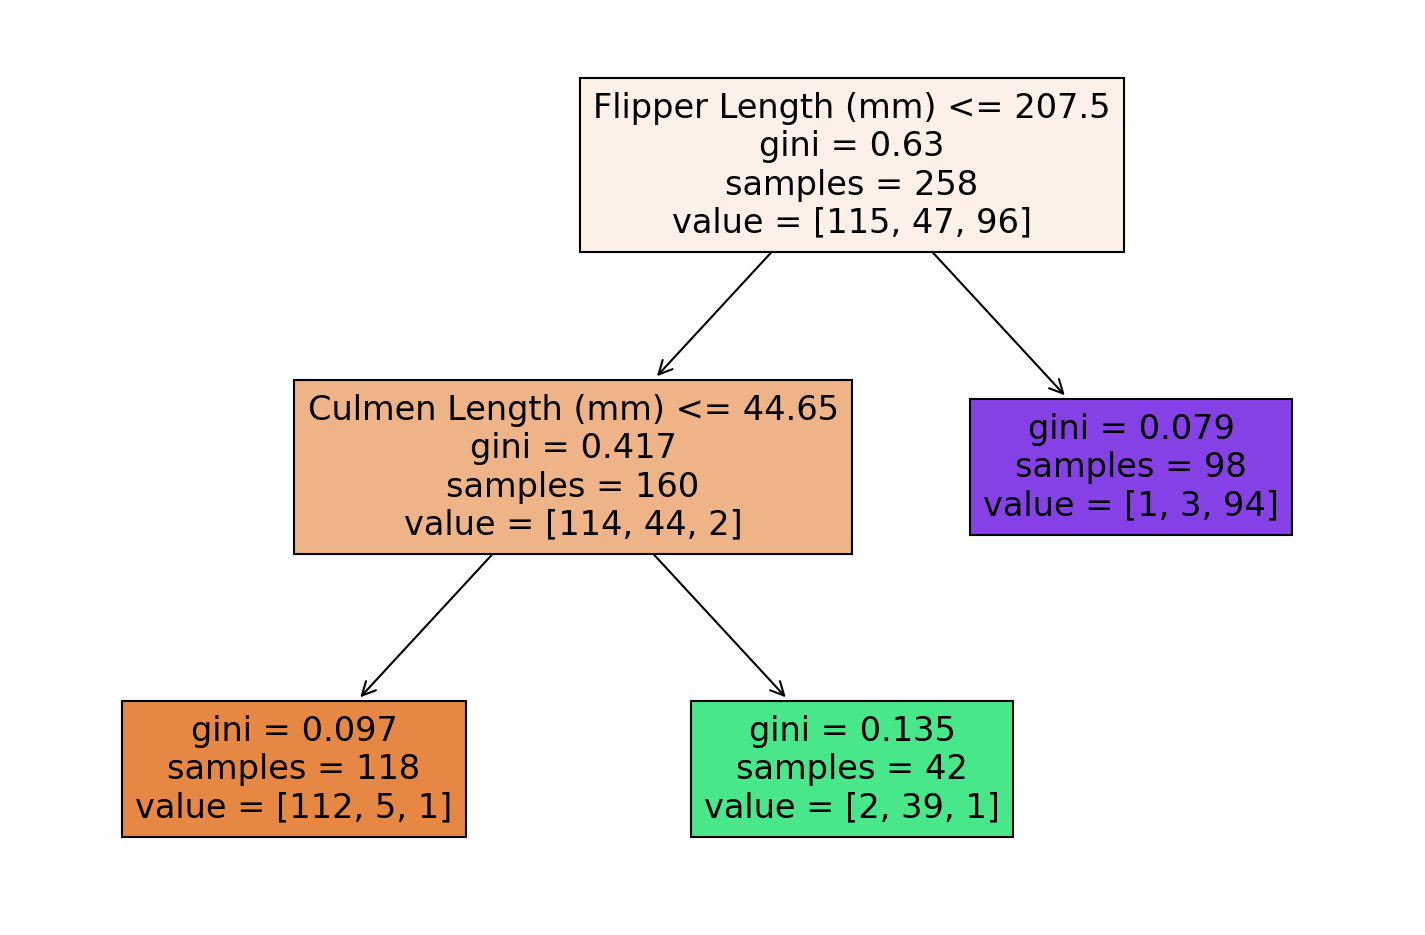

In [89]:
report_model(pruned_tree1)